# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.266991e+01     1.623791e+01
 * time: 0.08691596984863281
     1     6.221160e+01     9.256670e+00
 * time: 0.0943000316619873
     2     5.271969e+01     1.306168e+01
 * time: 0.11080193519592285
     3     3.882912e+01     9.160957e+00
 * time: 0.13329386711120605
     4     2.752743e+01     7.498791e+00
 * time: 0.1562819480895996
     5     2.279957e+01     6.604891e+00
 * time: 0.1757359504699707
     6     1.019903e+01     1.647844e+00
 * time: 0.23859906196594238
     7     8.236294e+00     2.579825e+00
 * time: 0.25522303581237793
     8     7.431517e+00     2.421471e+00
 * time: 0.27170896530151367
     9     6.978448e+00     1.250462e+00
 * time: 0.2882380485534668
    10     6.805655e+00     1.859668e+00
 * time: 0.30162596702575684
    11     6.638471e+00     7.365073e-01
 * time: 0.3187410831451416
    12     6.534986e+00     1.057803e+00
 * time: 0.33283305168151855
    13     6.342841e+00     1.313343e+00
 * time: 0.38

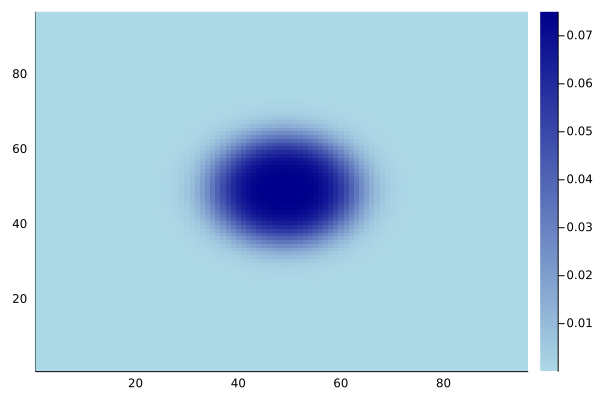

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))